### Import necessary libraries: 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 122)
pd.set_option("display.max_rows", 1000)

import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics


### Read and Understand the dataset

In [2]:
# Read the csv file:
leads_score=pd.read_csv("Leads.csv")


In [3]:
leads_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_score.shape

(9240, 37)

In [5]:
leads_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
leads_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning :

In [8]:
# We can observe that there are select values for many column.
#As per the data discription given this is because customer did not select any option from the list, hence it shows select.
#Select is equlivalent to null values. Hence, we need to repalce select with Nan before we handle missing values

leads_score=leads_score.replace("Select", np.nan)

#### Check for missing values:

In [9]:
# Checking the percentage of null values in each coulmn:
null_count=round((leads_score.isnull().sum())/len(leads_score)*100,2)
null_count.sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
leads_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
#columns having null values greater than 45%.
null_cols=list(null_count[null_count>45].index)
null_cols 

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
# Drop the columns:
leads_score.drop(null_cols, axis=1, inplace=True)

- We will impute the null values of remaining columns.

In [13]:
round((leads_score.isnull().sum())/len(leads_score)*100,2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

**Specialization**

In [14]:
# Imputing the values for Specialization column:

leads_score.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- The null count of the Specialization column is very high.
- The one of the reason could be that the specialization leads have is not present in the list or leads does not have a      specific specialization.
- It is better if we create a new category such as "Not_Mentioned" for Nan values.


In [15]:
leads_score.Specialization.fillna("Not_Mentioned", axis=0 ,inplace=True)

In [16]:
leads_score.Specialization.value_counts(dropna=False)

Not_Mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

**Tags**

In [17]:
# Imputing the Tags :
leads_score.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

- Here we will replace null values with "Not_Mentioned" as we don't know the specific reason.
- Also there are some tags whose value count is very low we can combine the such tags in one tag named as "Others_Tags".

In [18]:
# Replace the Nan Values:
leads_score.Tags.fillna("Not_Mentioned", axis=0 ,inplace=True)

In [19]:
# Combining the categories with value count less than 100:
other=['invalid number','Diploma holder (Not Eligible)', 'wrong number given','opp hangup', 'number not provided',
       'in touch with EINS', 'Lost to Others', 'Still Thinking','Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',  'Lateral student',  
       'Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']
for i in other:
    leads_score.Tags=leads_score.Tags.replace(i,"Other_Tags")

**What is your current occupation**

In [20]:
# What is your current occupation  column:
# First we will rename the columns :
leads_score.rename(columns={"What is your current occupation":"Current_Occupation"}, inplace=True)

In [21]:
leads_score.Current_Occupation.value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Current_Occupation, dtype: int64

- We will replace the Nan values with Not_mentioned.
- Also we will rename the Businessman and Housewife with Other as the value count is very low.

In [22]:
leads_score.Current_Occupation=leads_score.Current_Occupation.replace({'Businessman':'Other','Housewife':'Other',np.nan:'Not_mentioned'})

In [23]:
leads_score.Current_Occupation.value_counts(dropna=False)

Unemployed              5600
Not_mentioned           2690
Working Professional     706
Student                  210
Other                     34
Name: Current_Occupation, dtype: int64

**What matters most to you in choosing a course**

In [24]:
leads_score["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- We will repalce the column name for better understanding.

In [25]:
leads_score.rename(columns={'What matters most to you in choosing a course': 'Expectations from the course'},inplace= True)

- Here we will replace the null values with "Not Mentioned".

In [26]:
leads_score["Expectations from the course"].fillna("Not Mentioned", axis=0, inplace=True)

In [27]:
leads_score["Expectations from the course"].value_counts(dropna=False)

Better Career Prospects      6528
Not Mentioned                2709
Flexibility & Convenience       2
Other                           1
Name: Expectations from the course, dtype: int64

**Country**

In [28]:
#Country:
leads_score.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- **Here we will replace the null value with "Not_mentioned".** 
- **Also we will rename the countries other than "India" as "foreign_country".**

In [29]:
countries1= leads_score.Country.value_counts(dropna = False)
country=list(countries1[countries1<=69].index)
country.remove('unknown') # we will rename "unkonwn" as Not_mentioned.
country

['United States',
 'United Arab Emirates',
 'Singapore',
 'Saudi Arabia',
 'United Kingdom',
 'Australia',
 'Qatar',
 'Bahrain',
 'Hong Kong',
 'Oman',
 'France',
 'Kuwait',
 'South Africa',
 'Canada',
 'Nigeria',
 'Germany',
 'Sweden',
 'Philippines',
 'Uganda',
 'Italy',
 'Bangladesh',
 'Netherlands',
 'Asia/Pacific Region',
 'China',
 'Belgium',
 'Ghana',
 'Kenya',
 'Sri Lanka',
 'Tanzania',
 'Malaysia',
 'Liberia',
 'Switzerland',
 'Denmark',
 'Russia',
 'Vietnam',
 'Indonesia']

In [30]:
# Replacing with foreign_countries.
for i in country:
    leads_score.Country = leads_score.Country.replace(i,'foriegn_countries')

In [31]:
# Replacing Nan and unknown with "Not_mentioned"
leads_score.Country.replace( {np.nan:'Not_mentioned','unknown':'Not_mentioned'},inplace=True)

In [32]:
leads_score.Country.value_counts(dropna=False)

India                6492
Not_mentioned        2466
foriegn_countries     282
Name: Country, dtype: int64

**City**

In [33]:
leads_score.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- **We will replace the Nan values with "Not_mentioned"**

In [34]:
leads_score.City.fillna('Not_mentioned',inplace = True)

In [35]:
leads_score.City.value_counts(dropna=False)

Not_mentioned                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [36]:
# checking for remaining null values in dataset
(leads_score.isnull().sum()/len(leads_score)*100).sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Tags                                        0.000000
Update me on Supply Chain Content           0.000000
Newspaper Article                           0.000000
Get updates on DM Content                   0.000000
City                                        0.000000
I agree to pay the amount through cheque    0.000000
A free copy of Mastering The Interview      0.000000
X Education Forums                          0.000000
Search                                      0.000000
Magazine                                    0.

- **For remaining columns whose null count is less than 5%, we will remove the rows with null values.**

In [37]:
leads_score = leads_score[~leads_score["Page Views Per Visit"].isnull()]

In [38]:
leads_score.isnull().sum()/len(leads_score)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.318576
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.000000
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.000000
Last Activity                               0.000000
Country                                     0.000000
Specialization                              0.000000
Current_Occupation                          0.000000
Expectations from the course                0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.

In [39]:
leads_score = leads_score[~leads_score["Lead Source"].isnull()]

In [40]:
leads_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

### Checking for Outliers

In [41]:
leads_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Current_Occupation',
       'Expectations from the course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<AxesSubplot:xlabel='TotalVisits'>

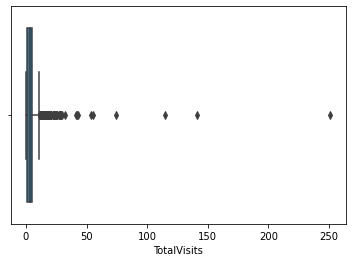

In [42]:
# For TotalVisits Column:
sns.boxplot(leads_score["TotalVisits"])

- We can clealy see that the outliers are present in the data.
- For outlier treatment we will cap the values between 0.05 and 0.95

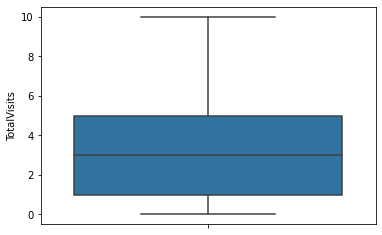

In [43]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads_score['TotalVisits'].quantile([0.05,0.95]).values
leads_score['TotalVisits'][leads_score['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_score['TotalVisits'][leads_score['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_score['TotalVisits'])
plt.show()

<AxesSubplot:xlabel='Page Views Per Visit'>

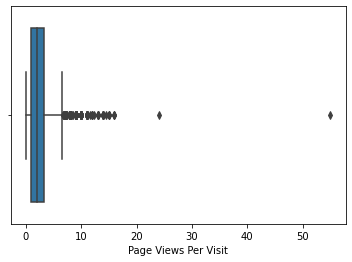

In [44]:
# For 'Page Views Per Visit' column:
sns.boxplot(leads_score["Page Views Per Visit"])

- Similarly here we will also cap the outliers 

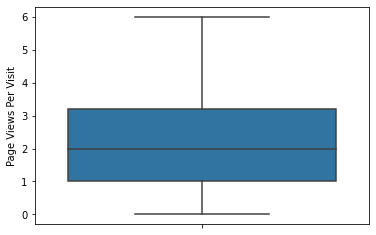

In [45]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads_score['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_score['Page Views Per Visit'][leads_score['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_score['Page Views Per Visit'][leads_score['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_score['Page Views Per Visit'])
plt.show()

<AxesSubplot:xlabel='Total Time Spent on Website'>

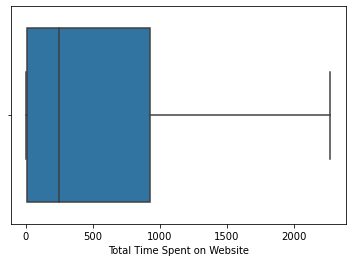

In [46]:
sns.boxplot(leads_score['Total Time Spent on Website'])


In [47]:
percentiles = leads_score['Total Time Spent on Website'].quantile([0.05,0.95]).values
leads_score['Total Time Spent on Website'][leads_score['Total Time Spent on Website'] <= percentiles[0]] = percentiles[0]
leads_score['Total Time Spent on Website'][leads_score['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Total Time Spent on Website'>

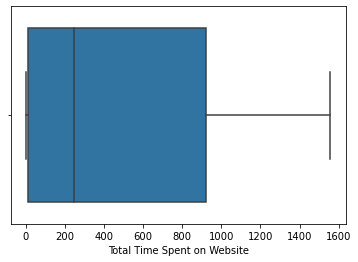

In [48]:
sns.boxplot(leads_score['Total Time Spent on Website'])

In [49]:
leads_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.191867,474.472559,2.265943
std,23348.029512,0.485053,2.780618,526.060205,1.790991
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,10.000000,1557.000000,6.000000


## Univariate Analysis

In [50]:
# lets make a funtion for univariate analysis for categorical columns 

def unicat_plot(col):
    sns.set_style("whitegrid")
    
    plot = sns.catplot(x=col, kind="count", data=leads_score, palette="Set2", aspect = 3.0);

    plt.title(f"Count plot for {col}", fontsize = 14)
    plt.xlabel(f"{col}", fontsize = 12)
    
    plt.ylabel("Count", fontsize = 12)
    plt.xticks(rotation=90)


    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(leads_score))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha="center")
    plt.show()

**Country**

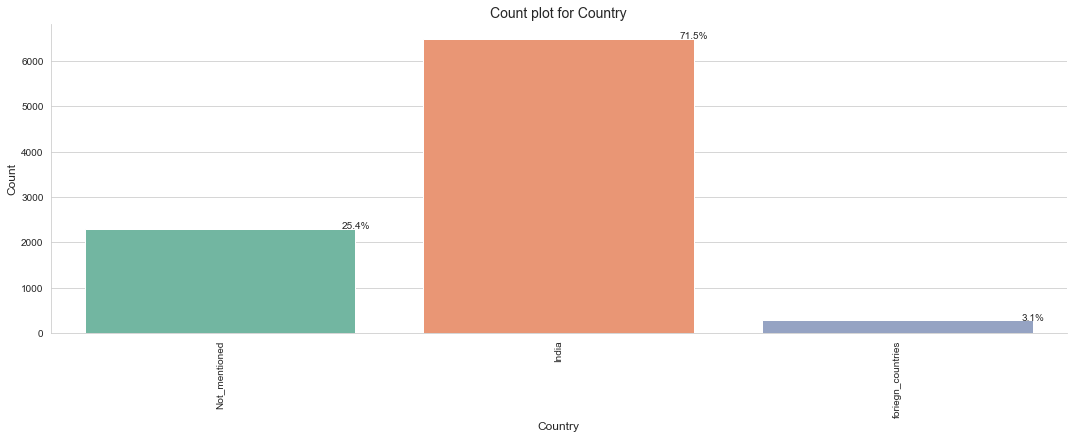

In [51]:
unicat_plot("Country")

- Insights:
     - We can see that maximum no. of leads are from India i.e 71% of total leads.
     
     

**Lead Origin**

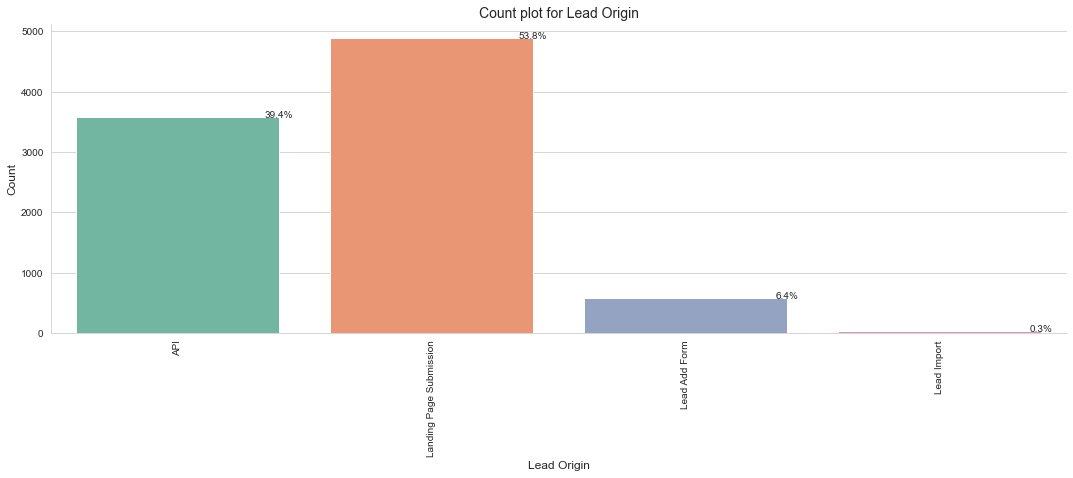

In [52]:
unicat_plot("Lead Origin")

- The maximum lead are originated through Landing Page Submission

**Last Activity**

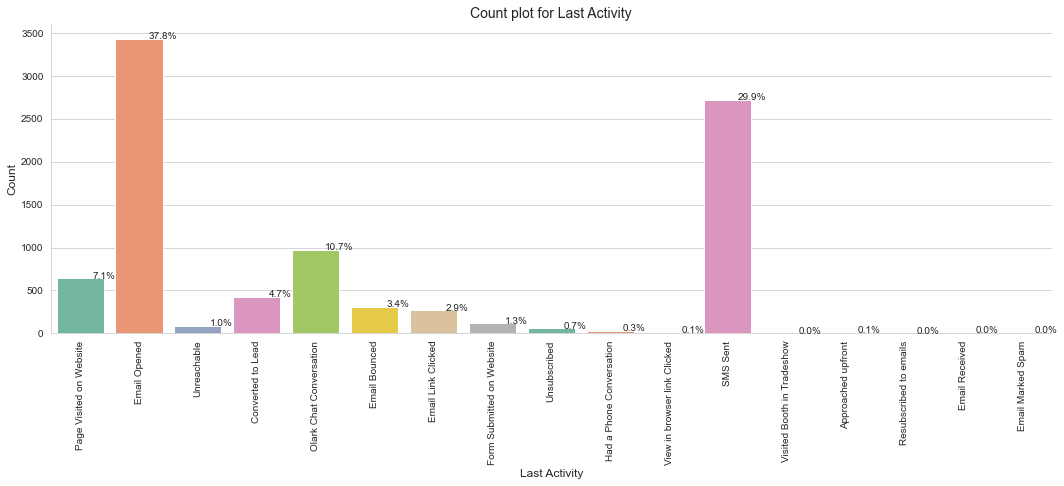

In [53]:
unicat_plot("Last Activity")

In [54]:
round(leads_score['Last Activity'].value_counts(dropna=False),2)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

-  We are here combineing some variables similar categorical to reduce the no of categorical variables present in the column.

In [55]:
list1=['Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'View in browser link Clicked', 'Approached upfront', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails']
for i in list1:
    leads_score["Last Activity"]=leads_score["Last Activity"].replace(i, "Others")

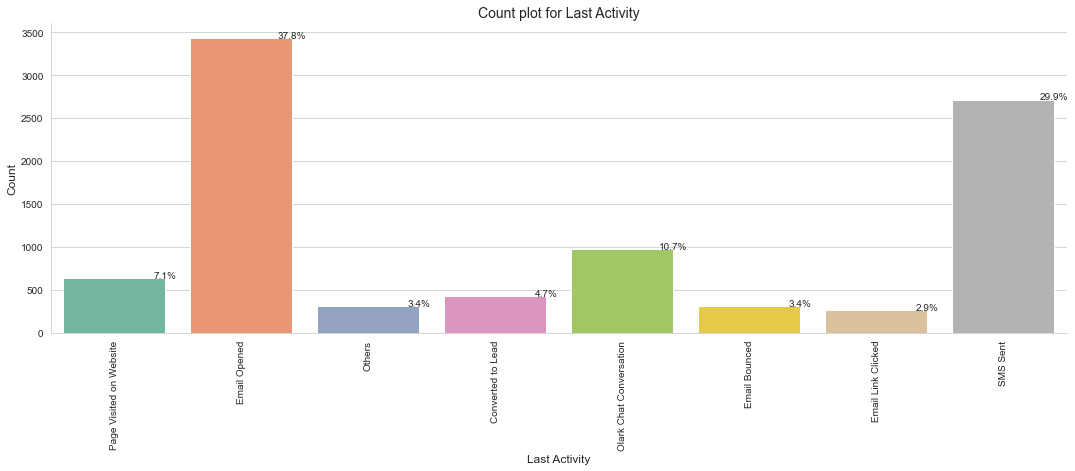

In [56]:
unicat_plot("Last Activity")

**Specialization**

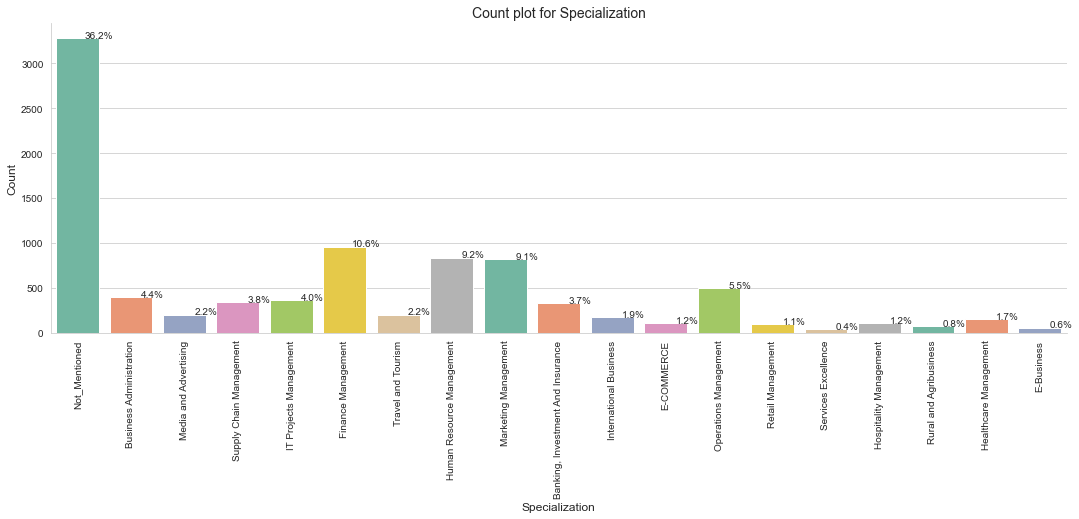

In [57]:
unicat_plot("Specialization")

In [58]:
leads_score.Specialization.value_counts()

Not_Mentioned                        3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- The maximum Specialization are from Management Studies. 

**Current_Occupation**

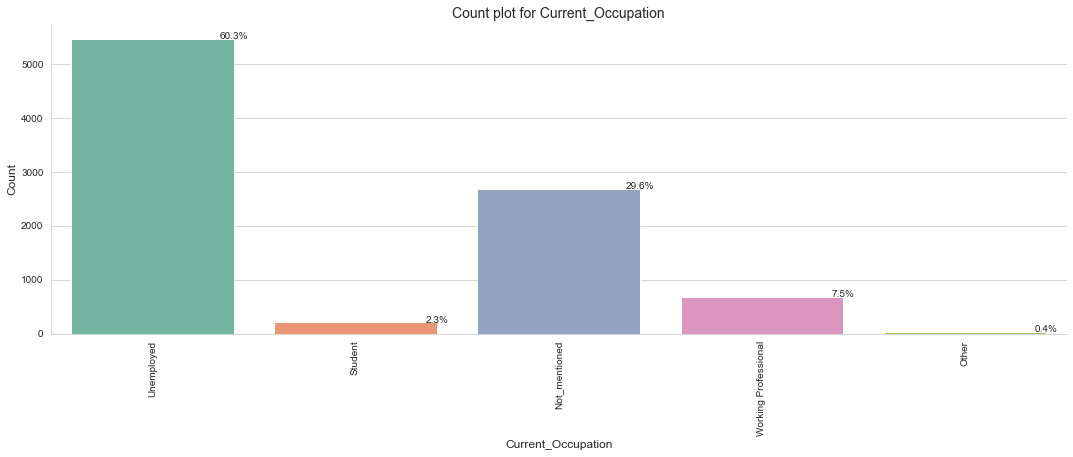

In [59]:
unicat_plot('Current_Occupation')

- Maximum leads are unemployed.

**Expectations from the course**

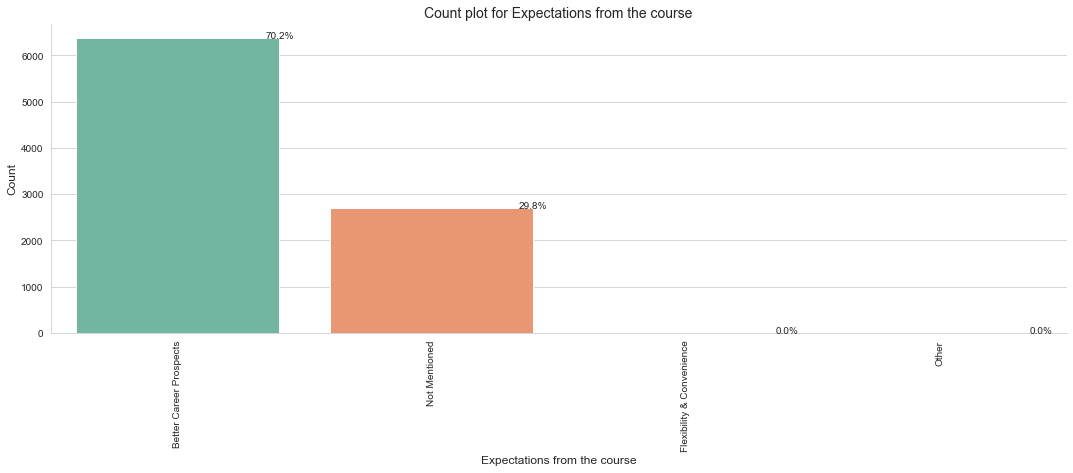

In [60]:
unicat_plot('Expectations from the course')

- Most of the leads are considering the course for Better Career Prospective.

**Tags**

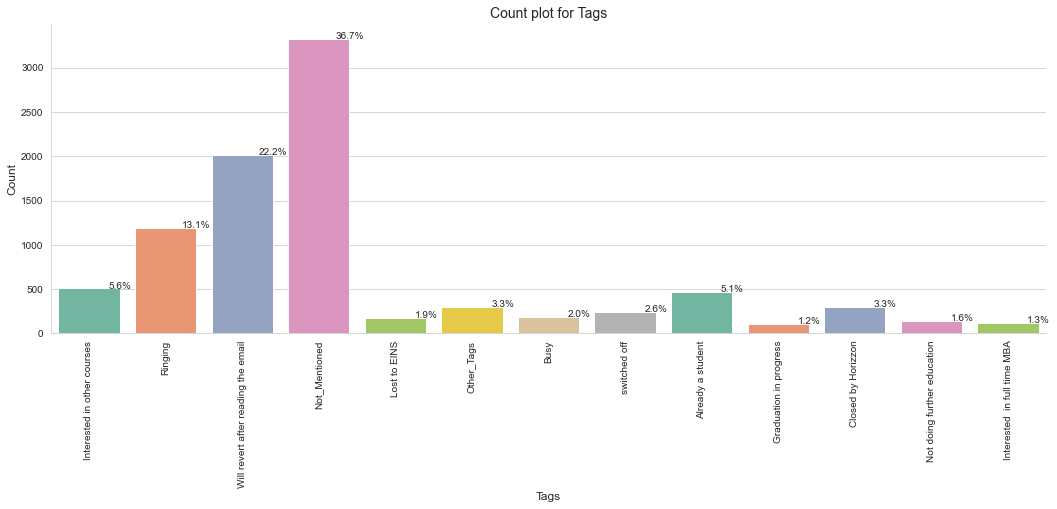

In [61]:
unicat_plot('Tags')

- We are here combineing some variables similar categorical to reduce the no of categorical variables present in the column. 

In [62]:
leads_score.Tags.replace({"Ringing": "did not connect", "Busy":"did not connect", "switched off": "did not connect","Interested in other courses" : "Interested in further studies", "Interested  in full time MBA": "Interested in further studies", "Graduation in progress" : "Interested in further studies"}, inplace=True)

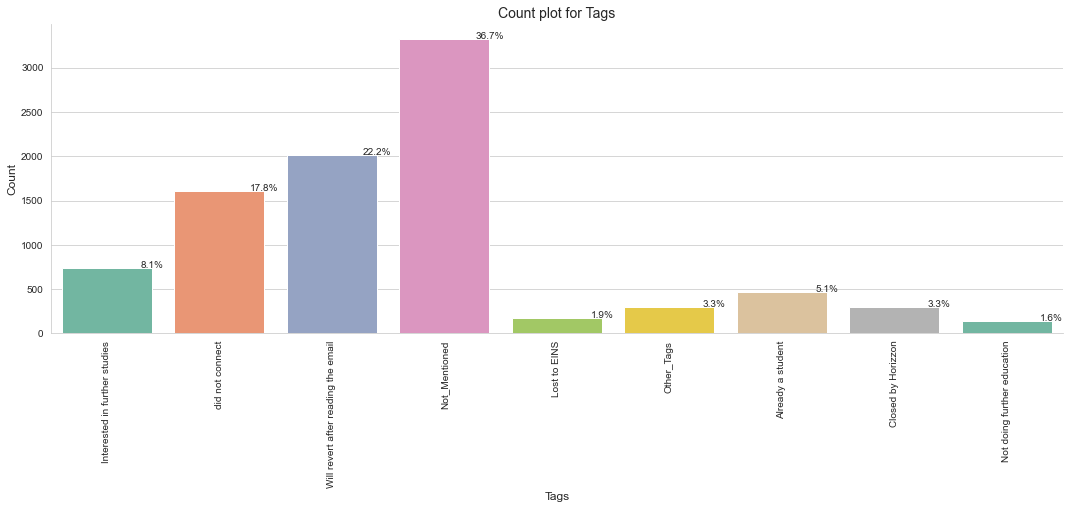

In [63]:
unicat_plot("Tags")

**City**

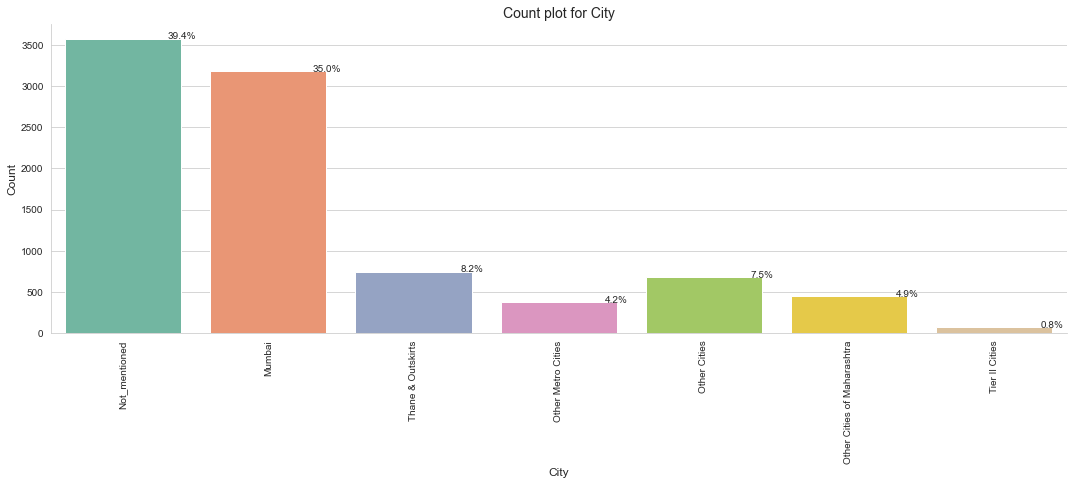

In [64]:
unicat_plot('City')

- Most of the leads have not mentioned there City.
- Besides that the most of the leads are from Mumbai.

**Last Notable Activity**

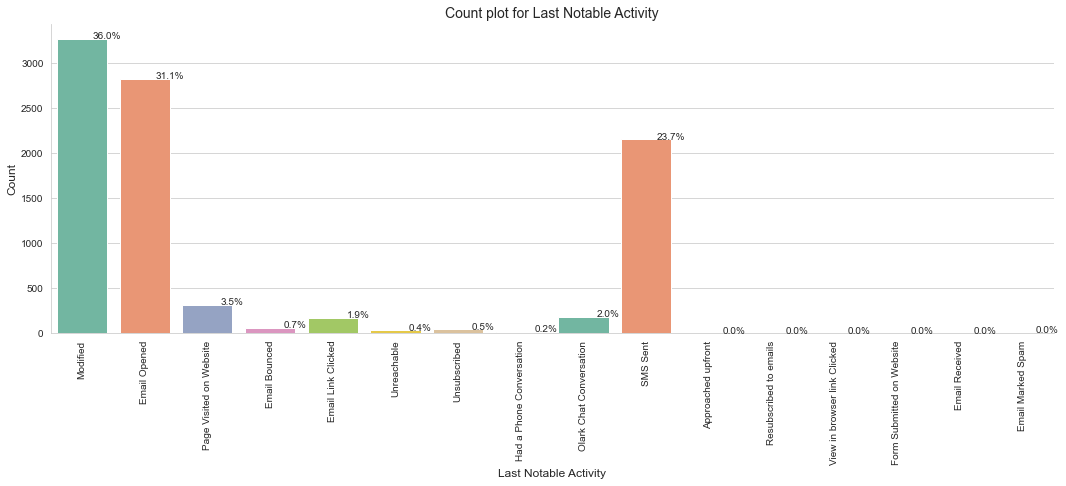

In [65]:
unicat_plot('Last Notable Activity')

- Here we are combining some variable similar variable to reduce the no. of categorical variables.

In [66]:
list2=['Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received','Email Marked Spam']
for i in list2:
    leads_score["Last Notable Activity"]=leads_score["Last Notable Activity"].replace(i, "Others")
    

leads_score["Last Notable Activity"].replace({"Email Link Clicked": "Email Opened", "Had a Phone Conversation": "Had a Conversation", "Olark Chat Conversation": "Had a Conversation","Email Bounced":"Unreachable"}, inplace= True)

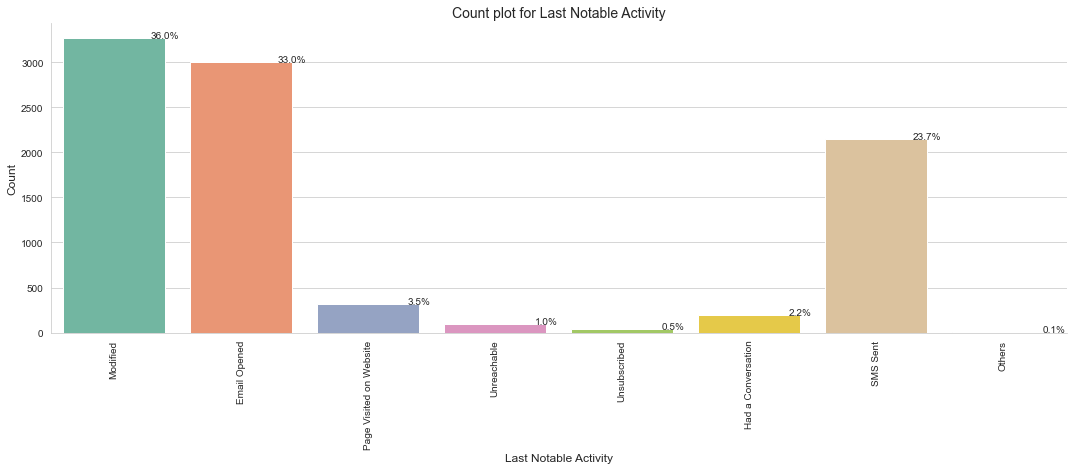

In [67]:
unicat_plot('Last Notable Activity')

In [68]:
leads_score.select_dtypes(include="object").columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'Current_Occupation', 'Expectations from the course', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

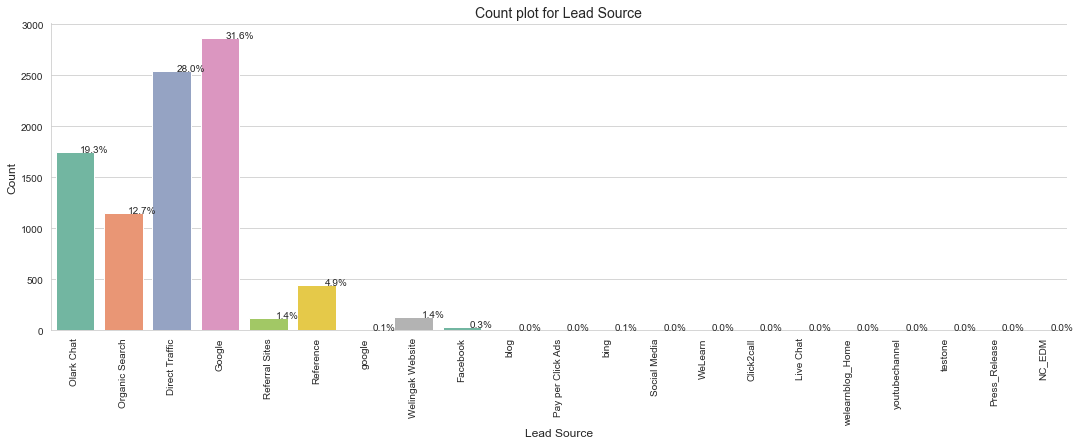

In [69]:
unicat_plot('Lead Source')

#### - We are here combineing some variables with low value count to reduce the no of categorical variables present in the column. 

In [70]:
list4=[ 'Facebook', 'bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM']
for i in list4:
    leads_score["Lead Source"]=leads_score["Lead Source"].replace(i, "Other_Sources")

leads_score["Lead Source"].replace({"google":"Google"}, inplace=True)

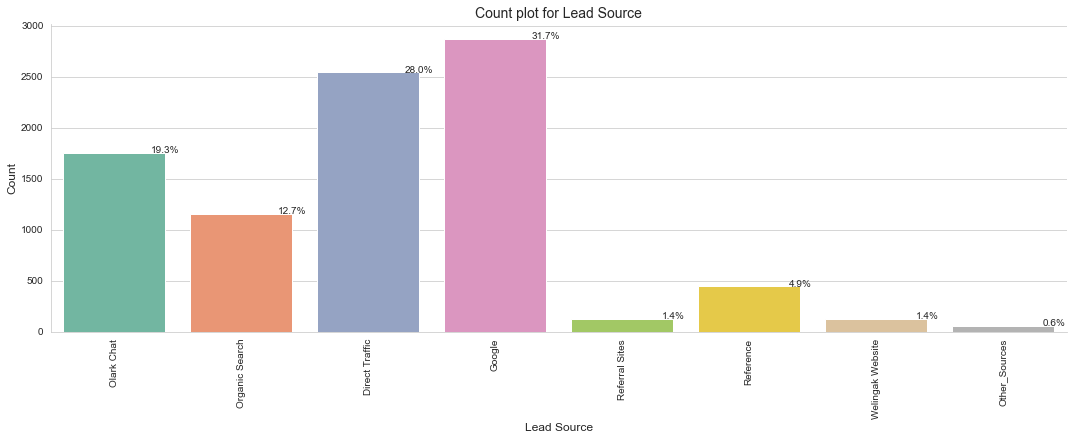

In [71]:
unicat_plot('Lead Source')

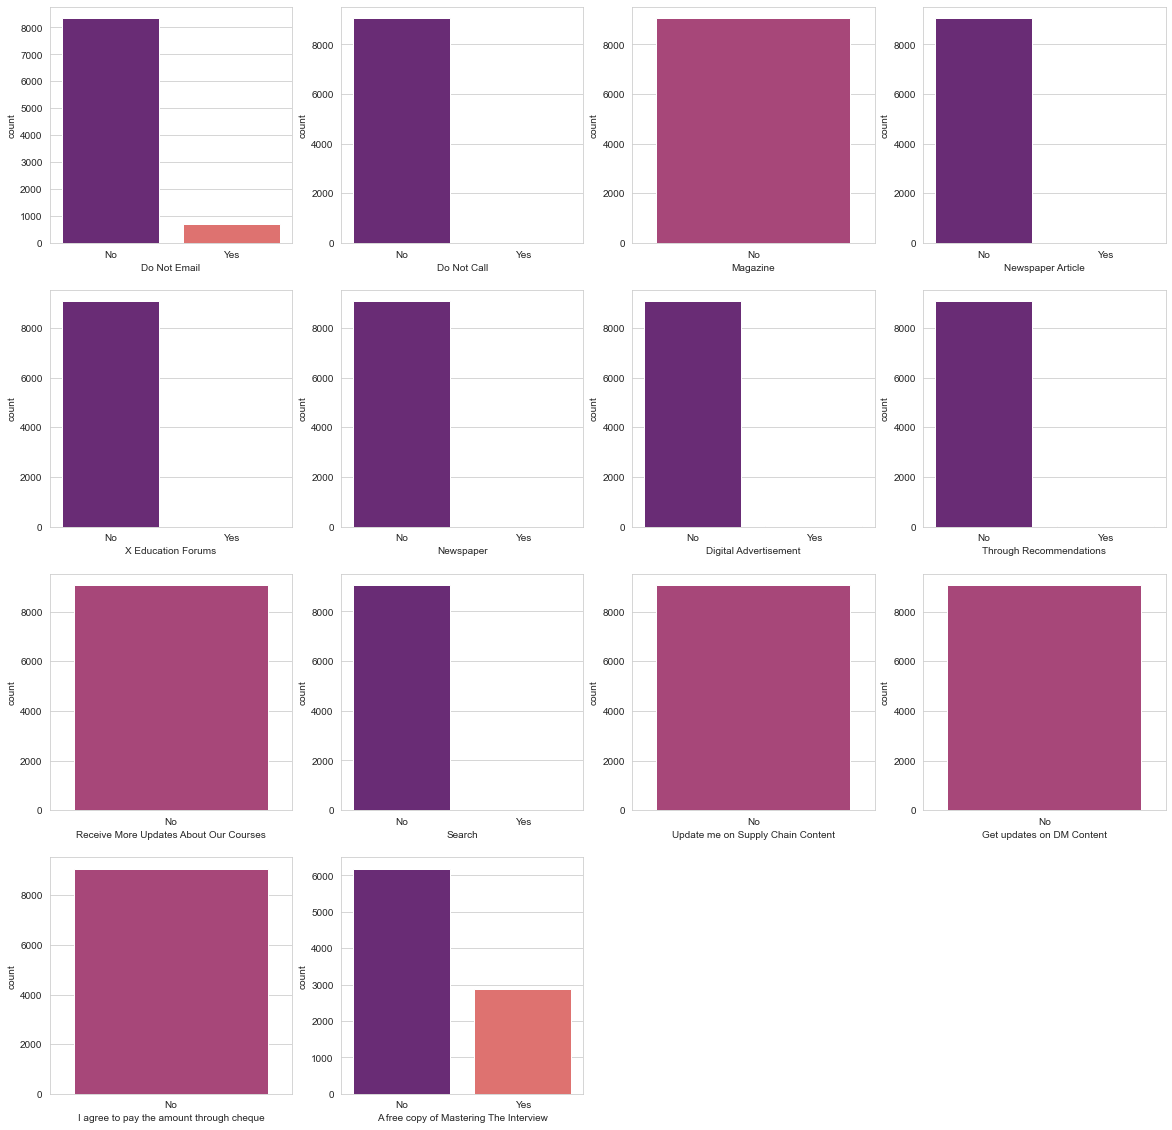

In [72]:
# subplots for columns having values either Yes or No:
list3=[ 'Do Not Email','Do Not Call','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'
       , 'Through Recommendations', 'Receive More Updates About Our Courses', 'Search',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',]
plt.figure(figsize=(20,20))
for i in enumerate(list3):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(data=leads_score, x=i[1], palette='magma')
plt.show()


- We will further remove this columns because of imbalance in the data in data prep step.

**Analysis for Numerical Columns**

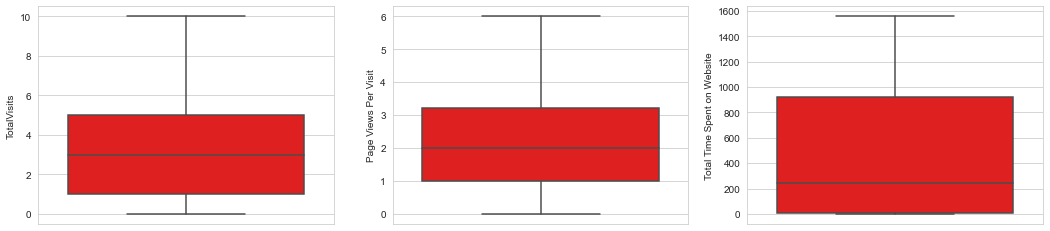

In [73]:
num_cols = ['TotalVisits', 'Page Views Per Visit',  'Total Time Spent on Website']
plt.figure(figsize=(18,4))

i = 1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=leads_score, color="r")
    i=i+1

## Bivariate Analysis

In [74]:
# creating an function for doing bivariate analysis
def bicat_plot(col):
    sns.set_style("whitegrid")
    
    plot = sns.catplot(x=col, hue = "Converted", kind="count", data=leads_score, palette="Set2", aspect = 3.0);

    plt.title(f"{col} Vs Converted", fontsize = 14)
    plt.xlabel(f"{col}", fontsize = 12)
    
    plt.ylabel("Count", fontsize = 12)
    plt.xticks(rotation=90)

    # Print the counts

    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(leads_score))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha="center")
    plt.show()

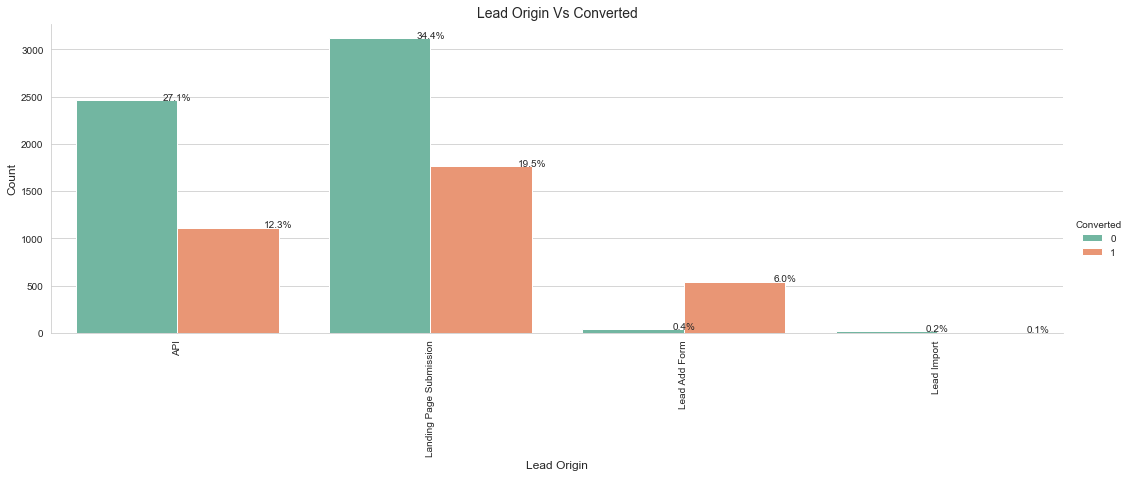

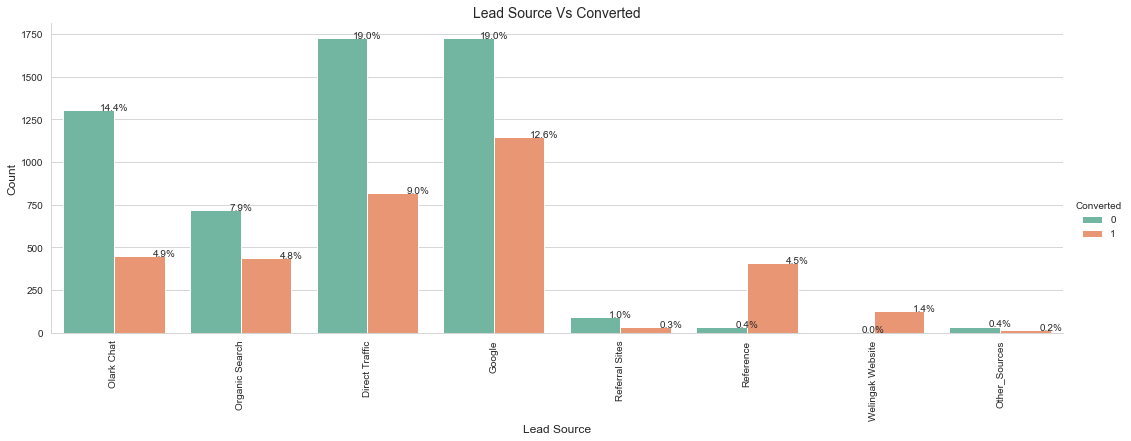

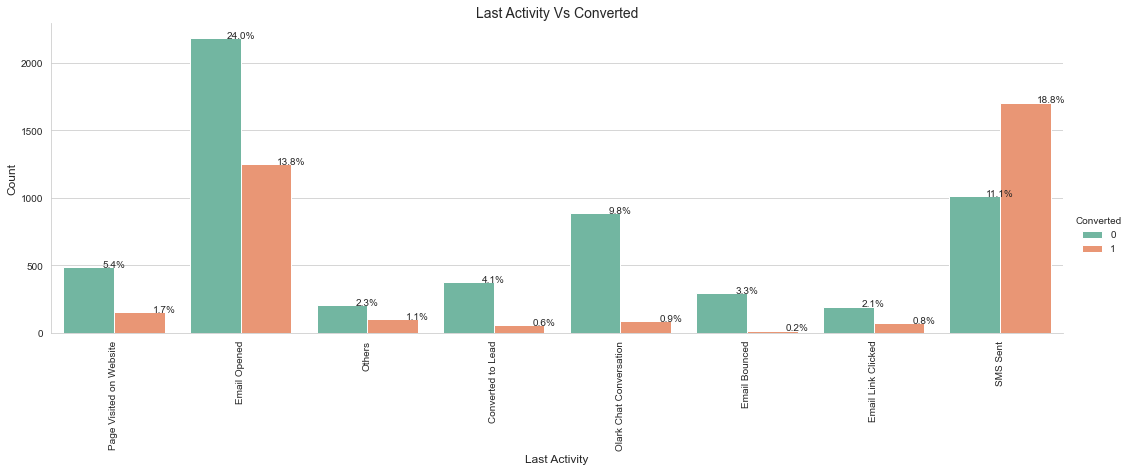

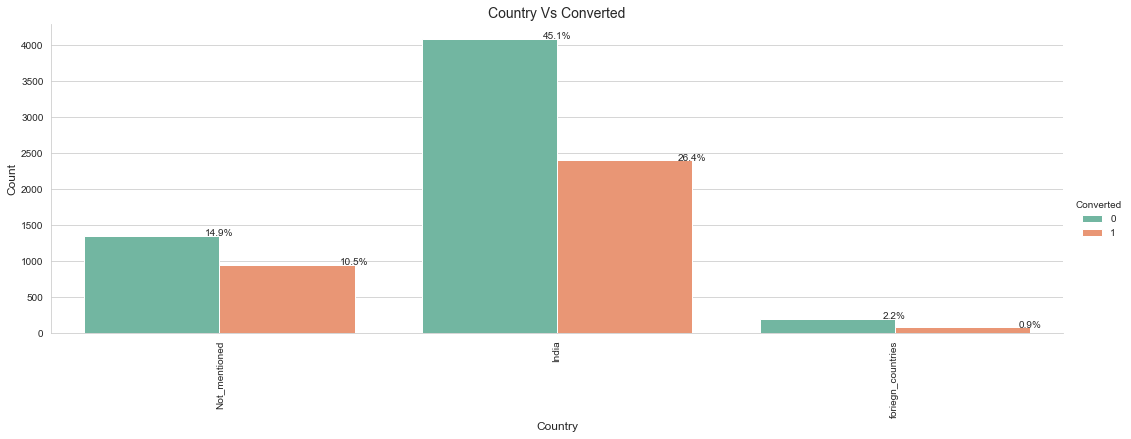

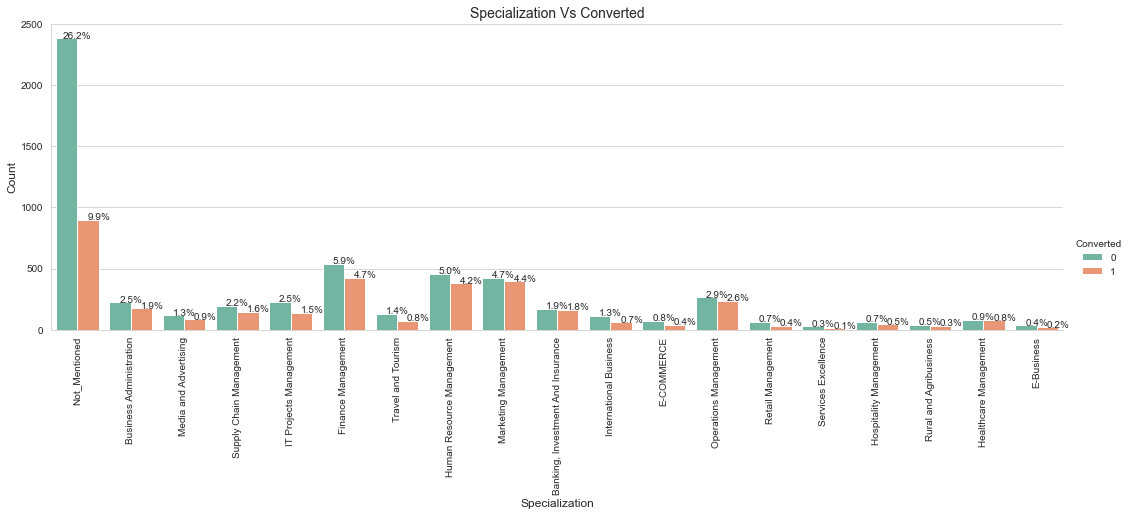

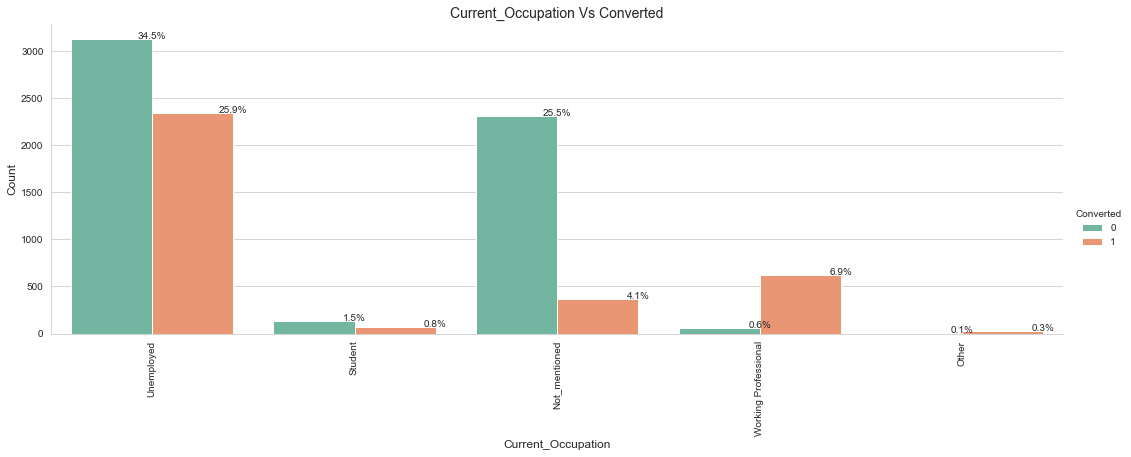

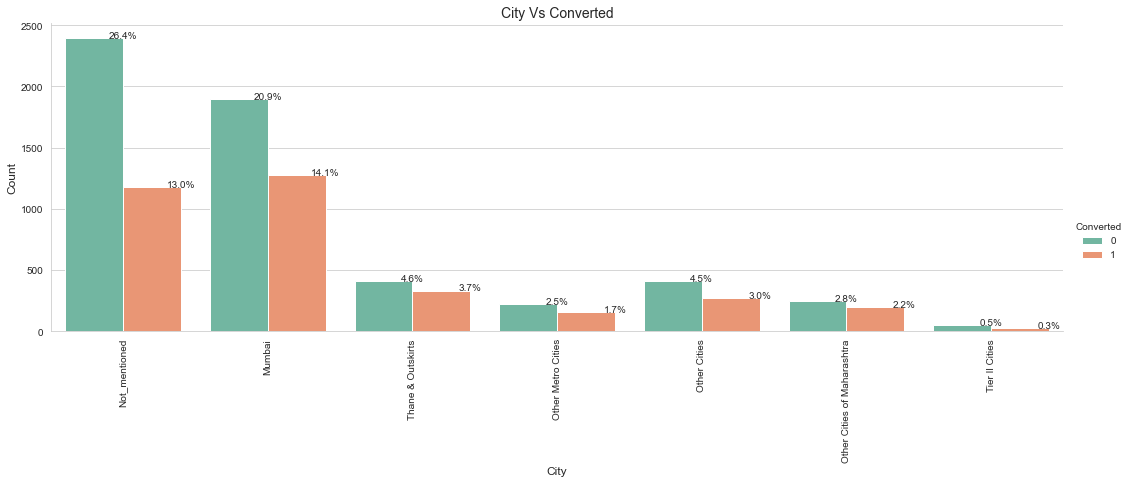

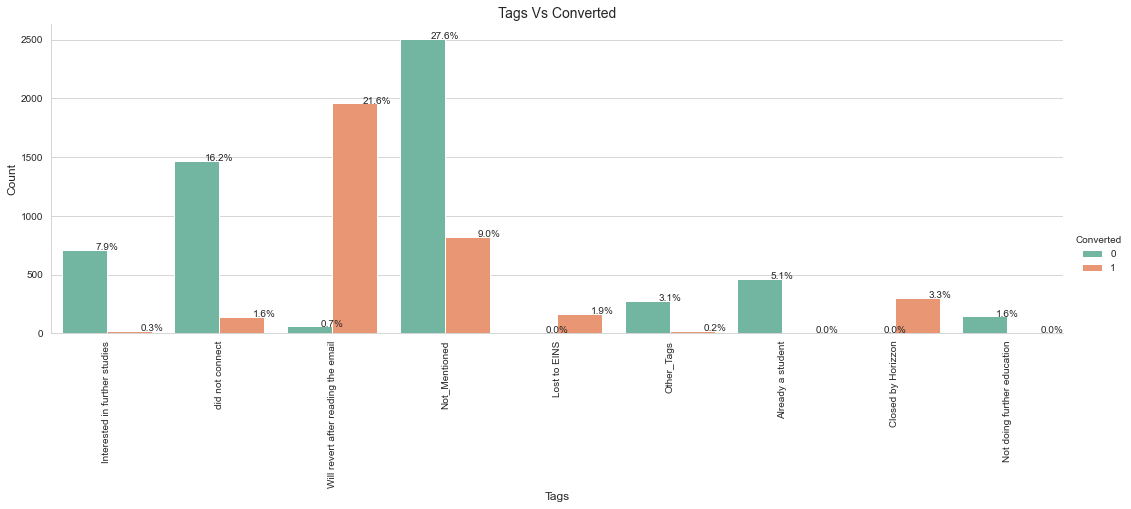

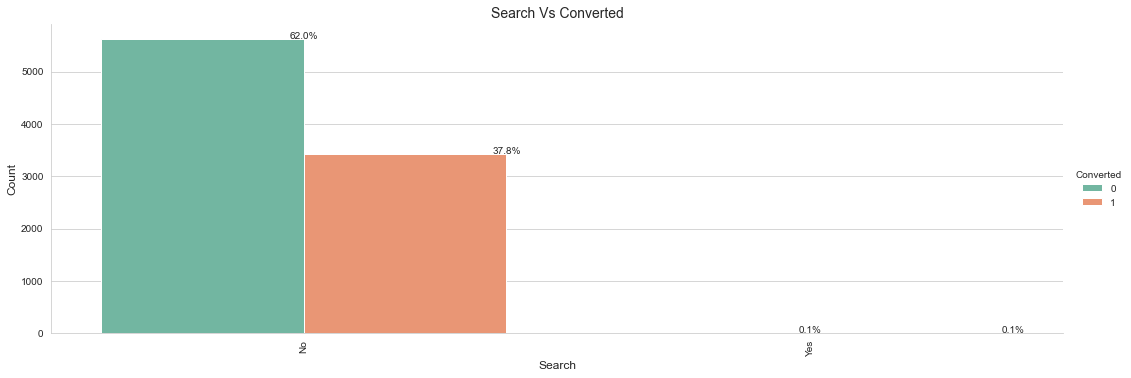

In [75]:
list5=['Lead Origin', 'Lead Source', 'Last Activity','Country', 'Specialization', 'Current_Occupation','City','Tags','Search']
for i in list5:
    bicat_plot(i)

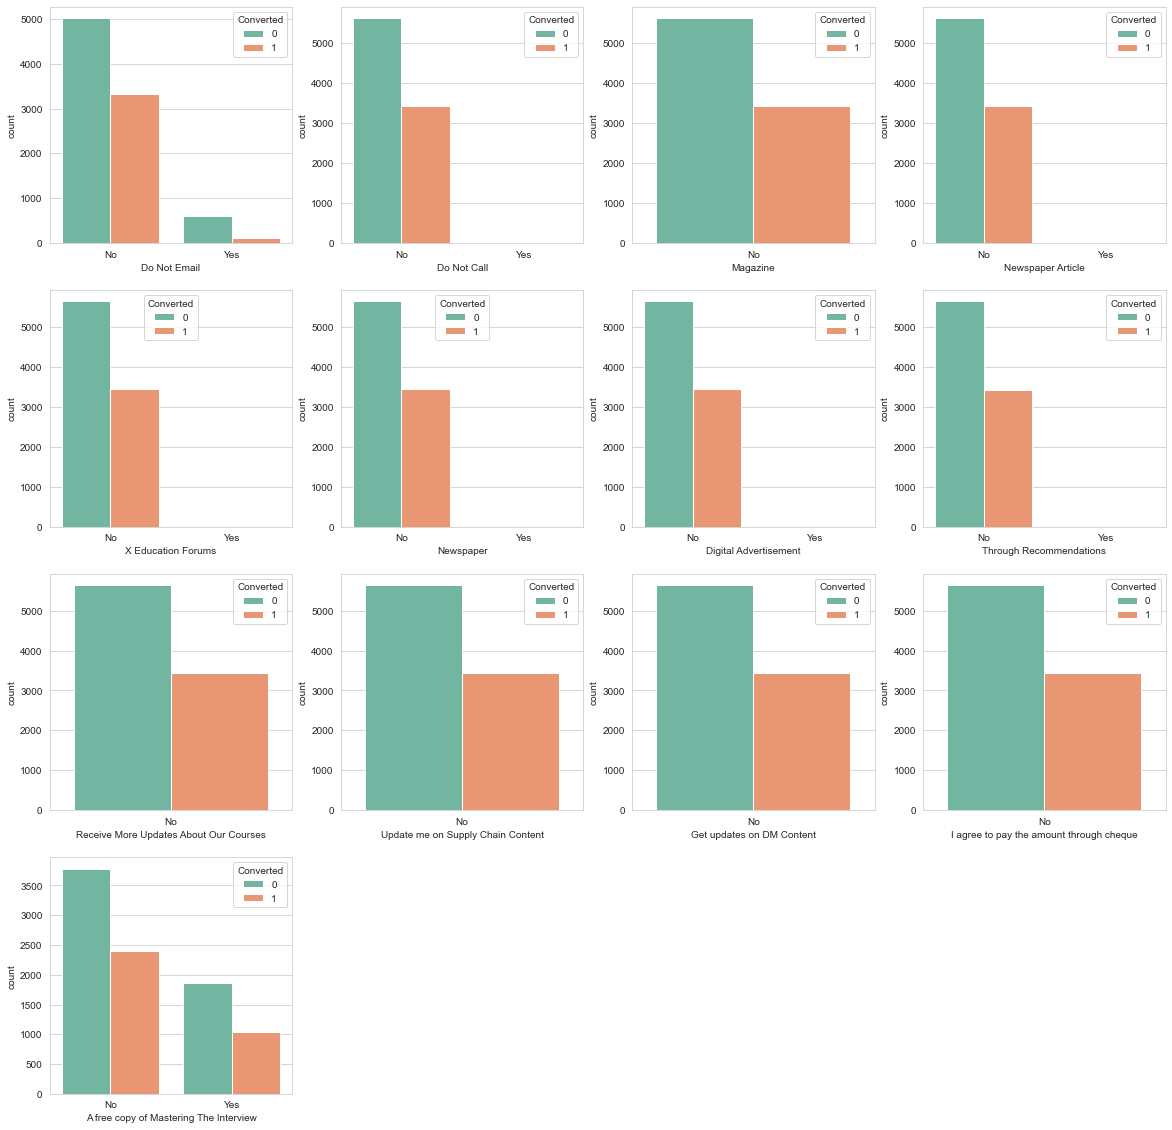

In [76]:
# subplots for columns having values either Yes or No:
list3=[ 'Do Not Email','Do Not Call','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'
       , 'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',]
plt.figure(figsize=(20,20))
for i in enumerate(list3):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(data=leads_score, x=i[1], hue= "Converted", palette="Set2")
plt.show()

- Insights from the Bivariate analysis:
    - The most of the columns such as 'Recieve Upadte About Our Course', 'Newspaper' etc are highly skewed, we don't need this coulms for our model.
    - Also we will drop all sales generated coulumns to abvoid ambiguilty in our final solutions.

#### Bivariate for numerical columns

In [77]:
num_cols

['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

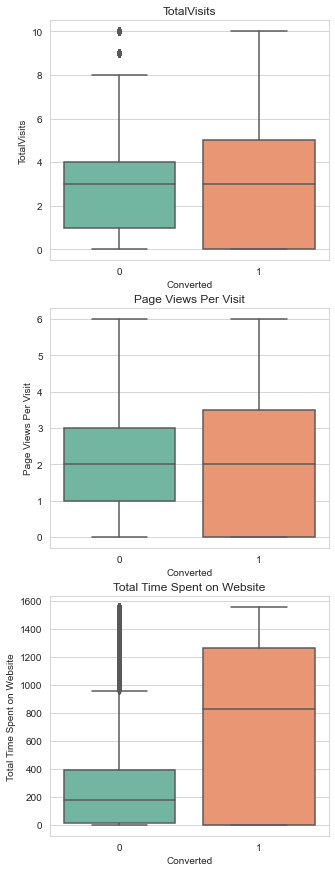

In [78]:
plt.figure(figsize=(5,15))

i = 1
for col in num_cols:
    plt.subplot(3,1,i)
    sns.boxplot(x="Converted",y=col, data=leads_score, palette="Set2")
    plt.title(f"{col}")
    i=i+1

<AxesSubplot:>

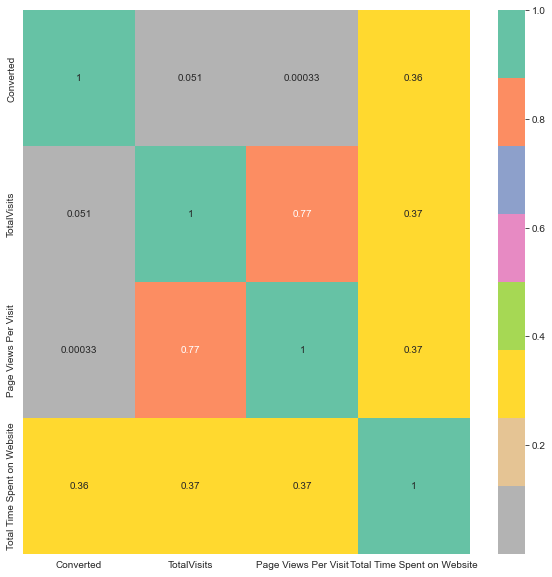

In [79]:
# Heatmap for numerical variables:

plt.figure(figsize=(10,10))
sns.heatmap(leads_score[['Converted','TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr(), annot=True, cmap="Set2_r")

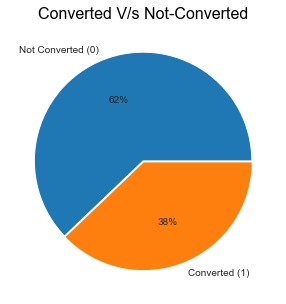

In [80]:
plt.figure(figsize=(10,5))
color=sns.color_palette("Set3")
plt.pie(round(leads_score.Converted.value_counts(normalize=True)*100,2),labels=["Not Converted (0)","Converted (1)"],explode=(0,.01),autopct='%.0f%%')
plt.title("Converted V/s Not-Converted",fontdict={"size":16,"color":"black"})
plt.show()

- **The Conversion Rate if 38%**

### Data prep:


In [81]:
# Removing sales generated and highly skewed columns:
leads_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Current_Occupation',
       'Expectations from the course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
cols_to_drop=['Do Not Email', 'Do Not Call', 'Country', 'Expectations from the course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Last Notable Activity', 'Last Activity','Tags']

In [83]:
leads_new=leads_score.drop(cols_to_drop, axis=1)

In [84]:
leads_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Current_Occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Not_Mentioned,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Not_Mentioned,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Not_Mentioned,Unemployed


In [85]:
leads_new.dtypes

Prospect ID                     object
Lead Number                      int64
Lead Origin                     object
Lead Source                     object
Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                  object
Current_Occupation              object
dtype: object

In [86]:
leads_new["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [87]:
leads_new["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other_Sources         54
Name: Lead Source, dtype: int64

- "Prospect ID" and "Lead Number" are the unique identifier columns, Hence we can drop such columns.

In [88]:
leads_new.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [89]:
leads_new.dtypes

Lead Origin                     object
Lead Source                     object
Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                  object
Current_Occupation              object
dtype: object

## Dummy variable:

In [90]:
cat_cols=list(leads_new.select_dtypes(include="object").columns)
cat_cols

['Lead Origin', 'Lead Source', 'Specialization', 'Current_Occupation']

In [91]:

leads_dummies=pd.get_dummies(data=leads_new, columns=cat_cols, drop_first=True)

In [92]:
leads_dummies.shape

(9074, 36)

<AxesSubplot:>

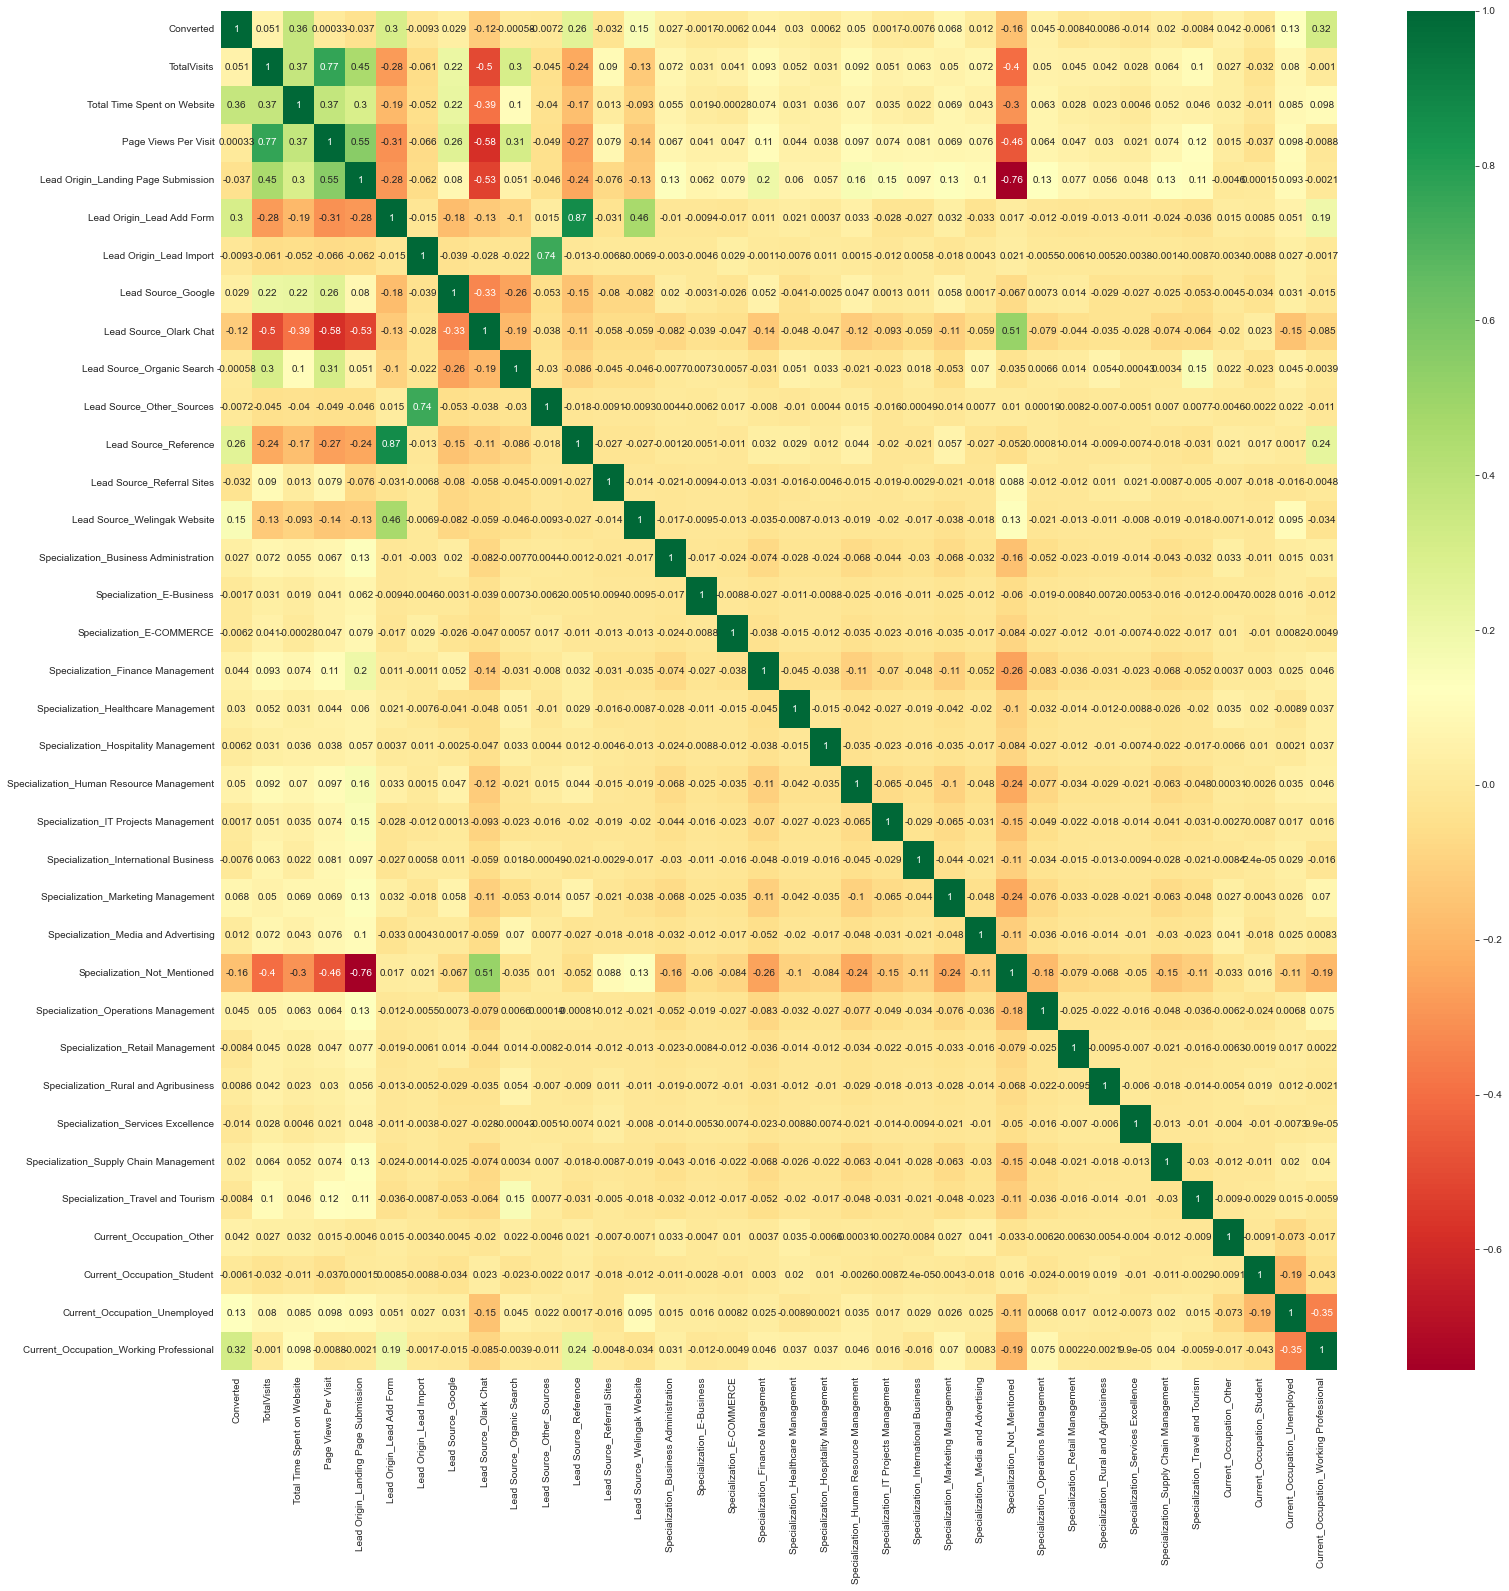

In [93]:
plt.figure(figsize=(25,25))
sns.heatmap(leads_dummies.corr(), annot=True, cmap="RdYlGn")

In [94]:
leads_dummies.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not_Mentioned',
       'Specialization_Operations Management',
       'Specia

In [95]:
# We will remove the columns that are highly related:
corr_cols=[ 'Lead Source_Olark Chat', 'Lead Source_Reference','Specialization_Not_Mentioned', 'Lead Source_Olark Chat',
          'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form']
leads_dummies.drop(corr_cols, axis=1, inplace=True)

In [96]:
leads_dummies.shape

(9074, 31)

### Train-Test Split:

In [97]:
leads_train, leads_test = train_test_split(leads_dummies, train_size=0.7, test_size=0.3, random_state=100)

In [98]:
leads_train.shape

(6351, 31)

In [99]:
leads_train.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other_Sources',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
 

In [100]:
leads_test.shape

(2723, 31)

In [101]:
## Define X and y for train dataset:
y_train=leads_train["Converted"]
X_train=leads_train.drop("Converted", axis=1)


In [102]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
3009,2.0,397,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,2.0,190,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4750,2.0,1380,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7987,5.0,1557,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [103]:
X_train[num_cols].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,6351.000000,6351.000000,6351.000000
mean,3.206267,2.279180,476.095575
std,2.787480,1.801096,526.308319
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,10.000000
50%,3.000000,2.000000,247.000000
75%,5.000000,3.330000,920.500000
max,10.000000,6.000000,1557.000000


In [104]:
num_cols

['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

 ### Rescaling of continuous variable

In [105]:
cont_var=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
scaler=StandardScaler()
X_train[cont_var]=scaler.fit_transform(X_train[cont_var])

In [106]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
3009,-0.432779,-0.150296,-0.155018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.543632,-0.155018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,-1.150329,-0.904666,-1.265540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4750,-0.432779,1.717578,-0.155018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7987,0.643547,2.053909,0.122613,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Model Building:

### Model 1: Model Building by Automated Approach:

In [107]:
# Building model with RFE selection :

log_model_1=LogisticRegression()
log_model_1.fit(X_train,y_train)

# RFE selection: selecting 15 features
rfe=RFE(log_model_1, 15)
rfe.fit(X_train, y_train)

#Column selected by RFE and there ranking:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Other_Sources', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 4),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 7),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 16),
 ('Specialization_International Business', False, 8),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 13),
 ('Specialization_Operations Management', False, 6),
 ('Specialization_Retail Ma

In [108]:
# Column selected by RFE
X_rfe_s=X_train.columns[rfe.support_]
X_rfe_s
# we will first use this column for manual model building process.

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Other_Sources',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [109]:
# Column selected by RFE
X_rfe_r=X_train.columns[~rfe.support_]
X_rfe_r
# we will first use this column for manual model building process.

Index(['TotalVisits', 'Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management'],
      dtype='object')

### Model Building by Manual Approach:

In [110]:
# Creating a function to build a model using statsmodels library 
def logstats_model(col):
    X_train_sm=sm.add_constant(X_train[col])
    log_model=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
    print(log_model.summary())
    return log_model

In [111]:
# Creating a function for VIF as we need this after every model:
def vif(col):
    df_col=X_train[col]
    vif=pd.DataFrame()
    vif["Features"]=df_col.columns
    vif["VIF"]=[variance_inflation_factor(df_col.values,i) for i in range(df_col.shape[1])]
    vif["VIF"] = round(vif["VIF"],3)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

#### Model 2: 

In [112]:
# Building the model with RFE selected features using stats model:
rfe_cols=['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Other_Sources',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']

logstats_model(rfe_cols)
vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3100.3
Date:                Tue, 10 May 2022   Deviance:                       6200.5
Time:                        12:54:30   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Import,2.343
3,Lead Source_Other_Sources,2.342
1,Page Views Per Visit,1.210
0,Total Time Spent on Website,1.174
13,Current_Occupation_Unemployed,1.162
7,Specialization_Marketing Management,1.107
5,Lead Source_Welingak Website,1.060
14,Current_Occupation_Working Professional,1.047
10,Specialization_Travel and Tourism,1.032
6,Specialization_Healthcare Management,1.025


- We will remove the column Lead Origin_Lead Import that have p-values greater than 0.05.

#### Model 3:

In [113]:
# Model 3: Removing the feat
cols_3=['Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source_Other_Sources',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']
logstats_model(cols_3)
vif(cols_3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3100.4
Date:                Tue, 10 May 2022   Deviance:                       6200.8
Time:                        12:54:30   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.208
0,Total Time Spent on Website,1.173
12,Current_Occupation_Unemployed,1.162
6,Specialization_Marketing Management,1.107
4,Lead Source_Welingak Website,1.060
13,Current_Occupation_Working Professional,1.047
9,Specialization_Travel and Tourism,1.031
5,Specialization_Healthcare Management,1.025
3,Lead Source_Referral Sites,1.016
7,Specialization_Retail Management,1.014


#### Model 4:

In [114]:
# Model 4:
cols_4=['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']

logstats_model(cols_4)
vif(cols_4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3100.9
Date:                Tue, 10 May 2022   Deviance:                       6201.8
Time:                        12:54:30   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.206
0,Total Time Spent on Website,1.172
11,Current_Occupation_Unemployed,1.154
5,Specialization_Marketing Management,1.106
3,Lead Source_Welingak Website,1.059
12,Current_Occupation_Working Professional,1.046
8,Specialization_Travel and Tourism,1.031
4,Specialization_Healthcare Management,1.024
2,Lead Source_Referral Sites,1.016
6,Specialization_Retail Management,1.014


#### Model 5:

In [115]:
# Model 5:
cols_5=['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Marketing Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']
logstats_model(cols_5)
vif(cols_5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3101.4
Date:                Tue, 10 May 2022   Deviance:                       6202.8
Time:                        12:54:30   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.204
0,Total Time Spent on Website,1.172
10,Current_Occupation_Unemployed,1.141
4,Specialization_Marketing Management,1.104
3,Lead Source_Welingak Website,1.059
11,Current_Occupation_Working Professional,1.040
7,Specialization_Travel and Tourism,1.030
2,Lead Source_Referral Sites,1.015
5,Specialization_Retail Management,1.014
6,Specialization_Services Excellence,1.004


#### Model 6:

In [116]:
# Model 6:
cols_6=['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Marketing Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']
logstats_model(cols_6)
vif(cols_6)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3102.3
Date:                Tue, 10 May 2022   Deviance:                       6204.5
Time:                        12:54:30   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.202
0,Total Time Spent on Website,1.172
9,Current_Occupation_Unemployed,1.129
4,Specialization_Marketing Management,1.103
3,Lead Source_Welingak Website,1.059
10,Current_Occupation_Working Professional,1.039
6,Specialization_Travel and Tourism,1.030
2,Lead Source_Referral Sites,1.015
5,Specialization_Services Excellence,1.004
7,Current_Occupation_Other,1.004


#### Model 7:

In [117]:
col7= ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Marketing Management',
       'Specialization_Travel and Tourism', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']
logstats_model(col7)
vif(col7)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3102.9
Date:                Tue, 10 May 2022   Deviance:                       6205.8
Time:                        12:54:31   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.202
0,Total Time Spent on Website,1.172
8,Current_Occupation_Unemployed,1.127
4,Specialization_Marketing Management,1.103
3,Lead Source_Welingak Website,1.059
9,Current_Occupation_Working Professional,1.038
5,Specialization_Travel and Tourism,1.030
2,Lead Source_Referral Sites,1.015
6,Current_Occupation_Other,1.004
7,Current_Occupation_Student,1.003


#### Model 8:

In [118]:
col8= ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_Marketing Management','Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']

logstats_model(col8)
vif(col8)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3104.1
Date:                Tue, 10 May 2022   Deviance:                       6208.2
Time:                        12:54:31   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.190
0,Total Time Spent on Website,1.172
7,Current_Occupation_Unemployed,1.110
4,Specialization_Marketing Management,1.100
3,Lead Source_Welingak Website,1.059
8,Current_Occupation_Working Professional,1.036
2,Lead Source_Referral Sites,1.015
5,Current_Occupation_Other,1.004
6,Current_Occupation_Student,1.002


#### Model 9:

In [119]:
col9= ['Total Time Spent on Website', 'Page Views Per Visit','Lead Source_Welingak Website',
       'Specialization_Marketing Management','Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']

logstats_model(col9)
vif(col9)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3105.6
Date:                Tue, 10 May 2022   Deviance:                       6211.2
Time:                        12:54:31   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.182
0,Total Time Spent on Website,1.171
6,Current_Occupation_Unemployed,1.103
3,Specialization_Marketing Management,1.100
2,Lead Source_Welingak Website,1.059
7,Current_Occupation_Working Professional,1.034
4,Current_Occupation_Other,1.004
5,Current_Occupation_Student,1.002


- We can see that all the variables are significant with p-value less than 0.05
- Also the VIF of the variables less than 5.

## Final Model:

In [120]:
## Final model:
col9= ['Total Time Spent on Website', 'Page Views Per Visit','Lead Source_Welingak Website',
       'Specialization_Marketing Management','Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional']


final_model=logstats_model(col9)
vif(col9)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3105.6
Date:                Tue, 10 May 2022   Deviance:                       6211.2
Time:                        12:54:31   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

,Features,VIF
1,Page Views Per Visit,1.182
0,Total Time Spent on Website,1.171
6,Current_Occupation_Unemployed,1.103
3,Specialization_Marketing Management,1.100
2,Lead Source_Welingak Website,1.059
7,Current_Occupation_Working Professional,1.034
4,Current_Occupation_Other,1.004
5,Current_Occupation_Student,1.002


## Model Evalution:

### Prediction on test dataset:

In [121]:
X_train_sm=sm.add_constant(X_train[col9])


In [122]:
y_train_pred=final_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12087804, 0.86536769, 0.32072149, 0.51816411, 0.81954783,
       0.64160938, 0.05042935, 0.65341181, 0.71727261, 0.82054954])

In [123]:
# Creating a Data frame:
y_train_pred_df = pd.DataFrame({"Prospect ID":y_train.index,'Converted':y_train.values, 'Prob_Converted':y_train_pred})

y_train_pred_df.head()

,Prospect ID,Converted,Prob_Converted
0,3009,0,0.120878
1,1012,0,0.865368
2,9226,0,0.320721
3,4750,1,0.518164
4,7987,1,0.819548


In [124]:
# We have choosed the optimal cutoff manually:
y_train_pred_df['Predicted'] = y_train_pred_df.Prob_Converted.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_df.head()

,Prospect ID,Converted,Prob_Converted,Predicted
0,3009,0,0.120878,0
1,1012,0,0.865368,1
2,9226,0,0.320721,0
3,4750,1,0.518164,1
4,7987,1,0.819548,1



#### Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value



In [125]:
# Confusion matrix:
confusion=confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted)
confusion

array([[3482,  423],
       [1046, 1400]], dtype=int64)

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(f"TP : {TP} ,  TN : {TN},  FP : {FP} , FN : {FN}" )

TP : 1400 ,  TN : 3482,  FP : 423 , FN : 1046


In [127]:
# Accuracy:
accuracy=metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)
accuracy

0.7686978428593922

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5723630417007359

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8916773367477593

In [130]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10832266325224071


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.7679648930334614


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7689929328621908


- Previousy we have selected the cutoff manually, now we will select the optimal cutoff.

#### PLOTTING ROC CURVE
- An ROC curve demonstrates several things:
    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a   decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Prob_Converted, drop_intermediate = False )

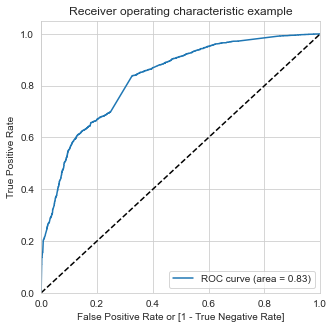

In [135]:
draw_roc( y_train_pred_df.Converted, y_train_pred_df.Prob_Converted)

**Optimal Cut-off:**

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Prob_Converted.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Prospect ID,Converted,Prob_Converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.120878,0,1,1,0,0,0,0,0,0,0,0
1,1012,0,0.865368,1,1,1,1,1,1,1,1,1,1,0
2,9226,0,0.320721,0,1,1,1,1,0,0,0,0,0,0
3,4750,1,0.518164,1,1,1,1,1,1,1,0,0,0,0
4,7987,1,0.819548,1,1,1,1,1,1,1,1,1,1,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.556448  0.971791  0.296287
0.2   0.2  0.633916  0.936222  0.444558
0.3   0.3  0.719887  0.852821  0.636620
0.4   0.4  0.760195  0.632461  0.840205
0.5   0.5  0.768698  0.572363  0.891677
0.6   0.6  0.757046  0.501226  0.917286
0.7   0.7  0.734687  0.407604  0.939565
0.8   0.8  0.705401  0.285773  0.968246
0.9   0.9  0.671548  0.153312  0.996159


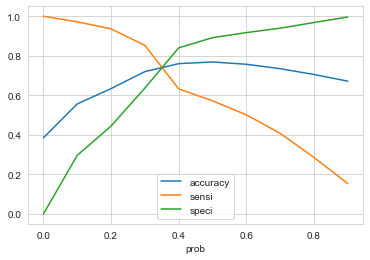

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- **From cutoff_df and graph take optimal cut-off as 0.3**

In [139]:
# Predicting using the optimal cutoff:
y_train_pred_df['final_Predicted'] = y_train_pred_df.Prob_Converted.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_df.head()

,Prospect ID,Converted,Prob_Converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,3009,0,0.120878,0,1,1,0,0,0,0,0,0,0,0,0
1,1012,0,0.865368,1,1,1,1,1,1,1,1,1,1,0,1
2,9226,0,0.320721,0,1,1,1,1,0,0,0,0,0,0,1
3,4750,1,0.518164,1,1,1,1,1,1,1,0,0,0,0,1
4,7987,1,0.819548,1,1,1,1,1,1,1,1,1,1,0,1


In [140]:
## Now we will give Lead Score:
y_train_pred_df['Lead_Score'] = y_train_pred_df.Prob_Converted.map( lambda x: round(x*100))

y_train_pred_df[['Prospect ID','Converted', 'Prob_Converted', 'final_Predicted','Lead_Score']].head()

,Prospect ID,Converted,Prob_Converted,final_Predicted,Lead_Score
0,3009,0,0.120878,0,12
1,1012,0,0.865368,1,87
2,9226,0,0.320721,1,32
3,4750,1,0.518164,1,52
4,7987,1,0.819548,1,82


#### Checking the percentage of conversion:

In [141]:
checking_df = y_train_pred_df.loc[y_train_pred_df['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2086
0     360
Name: final_Predicted, dtype: int64

In [142]:
# check the precentage of final_predicted conversions

2086/float(2086+360)

0.8528209321340965

### Checking  Accuracy, Sensitivity, Specificity :

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_Predicted )
confusion2

array([[2486, 1419],
       [ 360, 2086]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print(f"TP : {TP} ,  TN : {TN},  FP : {FP} , FN : {FN}" )

TP : 2086 ,  TN : 2486,  FP : 1419 , FN : 360


In [145]:
# Let's see the sensitivity of our final logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.8528209321340965

In [146]:
# Let us calculate specificity of our final logistic regression model
specificity=TN / float(TN+FP)
specificity

0.6366197183098592

In [147]:
# accuracy:
accuracy=metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_Predicted)
accuracy

0.7198866320264525

- **We will also check Prescision and Recall.**

### prescision and recall

In [148]:
#precision score
precision_score(y_train_pred_df.Converted , y_train_pred_df.final_Predicted)

0.5951497860199715

In [149]:
#recall
recall_score(y_train_pred_df.Converted, y_train_pred_df.final_Predicted)

0.8528209321340965

In [150]:
# Creating precision recall curve
y_train_pred_df.Converted, y_train_pred_df.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Prob_Converted)

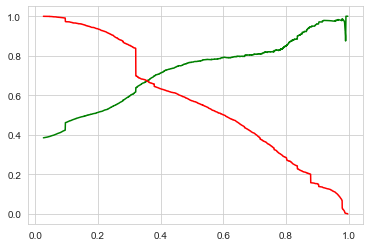

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Prediction on test dataset:


In [152]:
leads_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
3271,0,4.0,157,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,1,5.0,1513,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7936,0,2.0,74,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,1,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,8.0,164,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [153]:
# Define X and y for test dataset:
y_test=leads_test["Converted"]
X_test=leads_test.drop("Converted", axis=1)

In [154]:
# Rescaling the continuous variables of X_test:

X_test[cont_var]=scaler.transform(X_test[cont_var])

In [155]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
3271,0.284772,-0.606338,0.955505,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,0.643547,1.970301,1.510766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7936,-0.432779,-0.764053,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,-1.150329,-0.904666,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,1.719873,-0.593037,2.066027,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [156]:
# prediction on test dataset:
X_test_sm=sm.add_constant(X_test[col9])
y_test_pred=final_model.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.05271541, 0.97288445, 0.07079394, 0.27971577, 0.03416644,
       0.80522856, 0.22909394, 0.50758109, 0.32072149, 0.09587075])

In [157]:
# Creating a Data frame:
y_test_pred_df = pd.DataFrame({"Prospect ID":y_test.index,'Converted':y_test.values, 'Prob_Converted':y_test_pred})

y_test_pred_df.head()

,Prospect ID,Converted,Prob_Converted
0,3271,0,0.052715
1,1490,1,0.972884
2,7936,0,0.070794
3,4216,1,0.279716
4,3830,0,0.034166


In [158]:
#predicting the final values with optimal cut-off of 0.3
y_test_pred_df['final_Predicted'] = y_test_pred_df.Prob_Converted.map( lambda x: 1 if x > 0.3 else 0)

y_test_pred_df.head()

,Prospect ID,Converted,Prob_Converted,final_Predicted
0,3271,0,0.052715,0
1,1490,1,0.972884,1
2,7936,0,0.070794,0
3,4216,1,0.279716,0
4,3830,0,0.034166,0


In [159]:
## Assigning the Lead score on test dataset:
y_test_pred_df['Lead_Score'] = y_test_pred_df.Prob_Converted.map( lambda x: round(x*100))

In [160]:
y_test_pred_df.head()

,Prospect ID,Converted,Prob_Converted,final_Predicted,Lead_Score
0,3271,0,0.052715,0,5
1,1490,1,0.972884,1,97
2,7936,0,0.070794,0,7
3,4216,1,0.279716,0,28
4,3830,0,0.034166,0,3


In [161]:
# Checking the prediction rate
checking_test_df = y_test_pred_df.loc[y_test_pred_df['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    835
0    154
Name: final_Predicted, dtype: int64

In [162]:
# Conversion rate for test dataset :
835/float(835+154)

0.8442871587462083

#### Checking the Accuracy, Sensitivity, Specificity for Test  dataset:

In [163]:
# confussion matrics
confusion3 = metrics.confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.final_Predicted )
confusion3

array([[1082,  652],
       [ 154,  835]], dtype=int64)

In [164]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8442871587462083

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.6239907727797002

In [167]:
#accuracy
metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.final_Predicted)

0.7040029379360999

In [168]:
#precission_score
precision_score(y_test_pred_df.Converted , y_test_pred_df.final_Predicted)

0.5615332885003362

In [169]:
recall_score(y_test_pred_df.Converted , y_test_pred_df.final_Predicted)

0.8442871587462083

In [170]:
# Creating precision recall curve
y_test_pred_df.Converted, y_test_pred_df.final_Predicted
p, r, thresholds = precision_recall_curve(y_test_pred_df.Converted, y_test_pred_df.Prob_Converted)

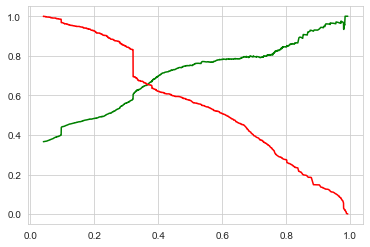

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [172]:
# final parameters of the model
final_model.params

const                                     -1.904590
Total Time Spent on Website                0.961970
Page Views Per Visit                      -0.419488
Lead Source_Welingak Website               4.600567
Specialization_Marketing Management        0.259992
Current_Occupation_Other                   2.733606
Current_Occupation_Student                 1.298099
Current_Occupation_Unemployed              1.493513
Current_Occupation_Working Professional    4.223126
dtype: float64